Doug Branton  
Astro 425  
Homework 2  


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from scipy.integrate import quad

**1.If we lived in a	Olberian universe (a) calculate	the	distance at	which any random line-of-sight	will	intersect	the	surface	of	a	star	(this	is	referred	to	as	the	point	at	which	the	optical	depth	of uniformly	distributed	stars	is	unity).	Assume	all	the	stars	have	the	same	luminosity	as	the	Sun,	the	average	number	density	of	stars	is	$10^9 Mpc^{-3}$ ,	and	the	radius	of	the	stars	is	$7x10^8m$ .**



Solution:  
When we observe the flux from a star, we are only recieving light from a very small component of the total surface area of the star. Thus, if we are considering the limit where at any line-of-sight we see the surface of a star, these small component areas will add together to yield the total surface area of one star in the field. This establishes that $f=J(r)$, the flux from one star is equivalent to the total luminosity of the shell at radius r.

Flux of one star in the field:
$$f=\frac{L_{sun}}{4 \pi r_{star}^2} $$

Total Luminosity: $$J(r)=\frac{nL}{4\pi}\int_0^r \!  \mathrm{d}r$$  
$$J(r)=\frac{nLr}{4\pi}$$

Setting Equations equal to each other:
$$\frac{L_{sun}}{4 \pi r_{star}^2}=\frac{nL_{sun}r}{4\pi}$$  
$$r=\frac{1}{nr_{star}^2}$$ 

Plugging in values:

$$L_{sun}=3.846e26 W$$  
$$r=\frac{1}{(10^9 Mpc^{-3})(7*10^8 m)^2}$$  
$$r=2.0408*10^{-27}\frac{Mpc^3}{m^2}*(\frac{3.086*10^{22} m}{1 Mpc})^2$$

Which yields:

$$r=1.9436*10^{18} Mpc$$


**2.When Edwin Hubble measured the expansion rate of the universe he derived a
Hubble’s constant of $500 km*s^-1*Mpc^-1$.  To get this value of $H_o$ how incorrect were 
his estimates of the distances to Cepheid stars. How does his value of the 
universe change the age of the universe and would we	need	to	live	in	an
accelerating	or	decelerating	universe	in	order	to	reconcile	the	Hubble	time	with the	current	age	of	the	universe	(13.7	Gyr). Remember	to	explain	your	answers.**


Solution:  
We know the true value of $H_o$:  
$$H_o=70\frac{km}{s*Mpc}$$  

From this, we calculate the discrepancy in measurement: $$\Delta H_0=430\frac{km}{s*Mpc}$$

This leads to the relative error: $$\frac{\Delta H_0}{H_0}=\frac{430}{70}=6.143$$

From here, we need to determine the relationship between $d_{cepheid}$ and $H_0$ to determine how a relative error in $H_0$ translates to a relative error in $d_{cepheid}$. We know that $-v=H_0*d$ and that $H_0$ arises as the slope of the plot of $v$ vs. $H_0$. Therefore, the relative error in $d_{cepheid}$= the relative error in $H_0$.

Thus, his cepheid measurements contained a relative error of 6.143.

His original measurement of $H_0$ would yield a hubble time of:  $$\frac{1}{H_0}=\frac{1}{500 \frac{km}{s*Mpc}}=1.95 Gyr$$

In order to reconcile this hubble time with the current age of the universe, there would need to be distance measured to the cepheids and thus the universe would have needed to expand more, meaning we would need to live in an accelerating universe. 

**3.Suppose you are a two-dimensional being, living on the surface of a
sphere with radius R. An object of width $ds \ll R$ is at a distance
r from you (remember, all distances are measured on the surface of
the sphere). What angular width $d\theta$ will you measure for the object?
Explain the behavior of $d\theta$ as $r \rightarrow \pi R$.**


Solution:

Begin with metric for a sphere:  $$ds^2=dr^2+R^2sin^2(\frac{r}{R})d \theta ^2$$

Due to being 2-d, all distances are measured on the surface of the sphere so $dr=0$. 

Thus we are left with:  
$$ds^2=R^2sin^2(\frac{r}{R})d \theta ^2$$

From this equation it is easy to solve for $d \theta$:  
$$d \theta=\frac{ds}{Rsin(\frac{r}{R})}$$

Now, as $r \rightarrow \pi R$:  
$$d \theta=\frac{ds}{Rsin(\frac{ \pi R}{R})}=\frac{ds}{Rsin(\pi )}=\frac{ds}{0}$$
Which means that as $r \rightarrow \pi R$, $d \theta \rightarrow \infty $

**4.Using	Python solve the	following	equation	numerically and	plot	a(t)	vs	t. Note	“.
”	represents	the	time	derivative,**


$$\dot{a}^2=H_0^2 a^{-3}$$


**Where	$H_0$ is	the	Hubble	constant	($H_0=70	\frac{km}{s*Mpc}$). Solve	the	integration	algebraically	and	overlay	the	solution	on	your	plot.**


Analytic Solution:

$$\dot{a}=H_0 a^{\frac{-3}{2}}$$

We can seperate variables such that:

$$a^{\frac{3}{2}}da=H_0 dt$$

Integrating, we find that:
$$\frac{2}{5}a^{\frac{5}{2}}da=H_0 t$$  
$$a=(\frac{5}{2}H_0t)^{\frac{2}{5}}$$

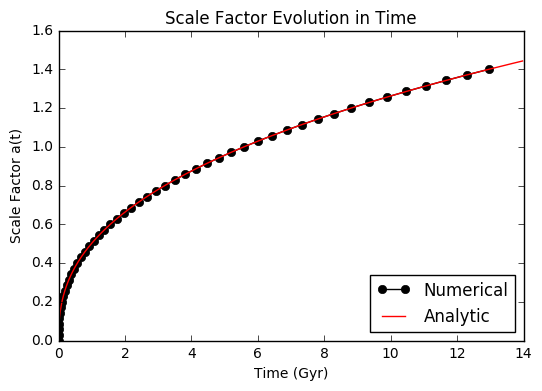

In [79]:
H0=70*u.km/(u.second*u.megaparsec)
H0=H0.to(1/u.second)
H0Y=(H0.to(1/u.gigayear))*u.gigayear
h_t=(1/H0).to(u.gigayear)
t_range=np.arange(0,(h_t/u.gigayear),0.0001)

#Analytic Solution
a_analytic = (5.0/2.0*(H0.to(1/u.gigayear)*u.gigayear)*t_range)**(2.0/5.0)

#Computational Solution using scipy.integrate.odeint
def func(a,H):
    dadt=a**(1.5)/H
    return dadt

def expint(lim):
    return quad(func,0,lim,args=(H0Y))

a_range=np.linspace(0,1.4)
vec_expint = np.vectorize(expint)
t,err=vec_expint(a_range)

plt.plot(t,a_range,marker='o',c='k',label="Numerical")
plt.plot(t_range,a_analytic,c='r',label="Analytic")
plt.title("Scale Factor Evolution in Time")
plt.ylabel("Scale Factor a(t)")
plt.xlabel("Time (Gyr)")


plt.legend(loc=4)
